In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_21712\2221108346.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Setup working directory and load data
# DIR = '/content/drive/MyDrive/Colab Notebooks/Project'
# FILENAME = 'Data/Sudarsan Sir-Acceleration data with g.csv'
# os.chdir(DIR)
# Load gait data
df = pd.read_csv('D://Projects_AIML//Project//Data//shashank-Acceleration data with g.csv')
df.head(15)

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.017158,0.435745,9.835680,0.383072,9.852777
1,0.019158,0.462081,9.823709,0.366313,9.841390
2,0.021158,0.497994,9.773431,0.344765,9.792181
3,0.023158,0.555455,9.742306,0.320823,9.763400
4,0.025158,0.572214,9.727941,0.304064,9.749498
5,0.027158,0.586579,9.703999,0.287304,9.725955
6,0.029153,0.586579,9.703999,0.287304,9.725955
7,0.031149,0.586579,9.703999,0.287304,9.725955
8,0.033149,0.586579,9.715970,0.294487,9.738114
9,0.035149,0.636858,9.720758,0.426168,9.750915


In [5]:
start_index = 0
end_index = 50

df_subset = df.loc[start_index:end_index]

In [7]:
start_index = 33135
end_index = 33235

df_subset = df.loc[start_index:end_index]

In [8]:
start_index = 11035
end_index = 11285 #250

df_subset = df.loc[start_index:end_index]

In [9]:
df_subset

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
11035,22.084375,-30.584431,-2.530671,2.530671,30.793116
11036,22.086376,-29.961937,-2.590526,2.458845,30.174069
11037,22.088377,-28.889336,-2.870648,2.583344,29.146320
11038,22.090377,-28.001087,-3.301604,2.937685,28.347689
11039,22.092377,-27.744907,-3.596091,3.184288,28.157618
...,...,...,...,...,...
11281,22.576377,-11.590630,15.644313,1.975216,19.570097
11282,22.578377,-11.478103,15.249269,2.042254,19.195256
11283,22.580377,-11.676821,14.744093,1.810017,18.894777
11284,22.582377,-11.504438,14.078205,1.800440,18.269908


In [10]:
print(df['Acceleration x (m/s^2)'])

0        0.435745
1        0.462081
2        0.497994
3        0.555455
4        0.572214
           ...   
28500   -0.505177
28501   -0.497994
28502   -0.543484
28503   -0.586579
28504   -0.605733
Name: Acceleration x (m/s^2), Length: 28505, dtype: float64


In [11]:
from matplotlib.legend import Shadow
# User-defined function for producing a component plot of a vector
def plotveccomp(x, name = ' ', axis = None, linewidth = 1, color = 'black', marker = ''):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, linewidth = linewidth, color = color, marker = marker)
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue',label='Mean')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red',label='Z-Score')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  plt.legend(framealpha=1, frameon=True,bbox_to_anchor=(1.0, 1.0))
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Acceleration (m/s^2)')
  ax1.set_title('Acceleration data(X-axis)')
  ax2.set_title('Acceleration data(Y-axis)')
  ax3.set_title('Acceleration data(Z-axis)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


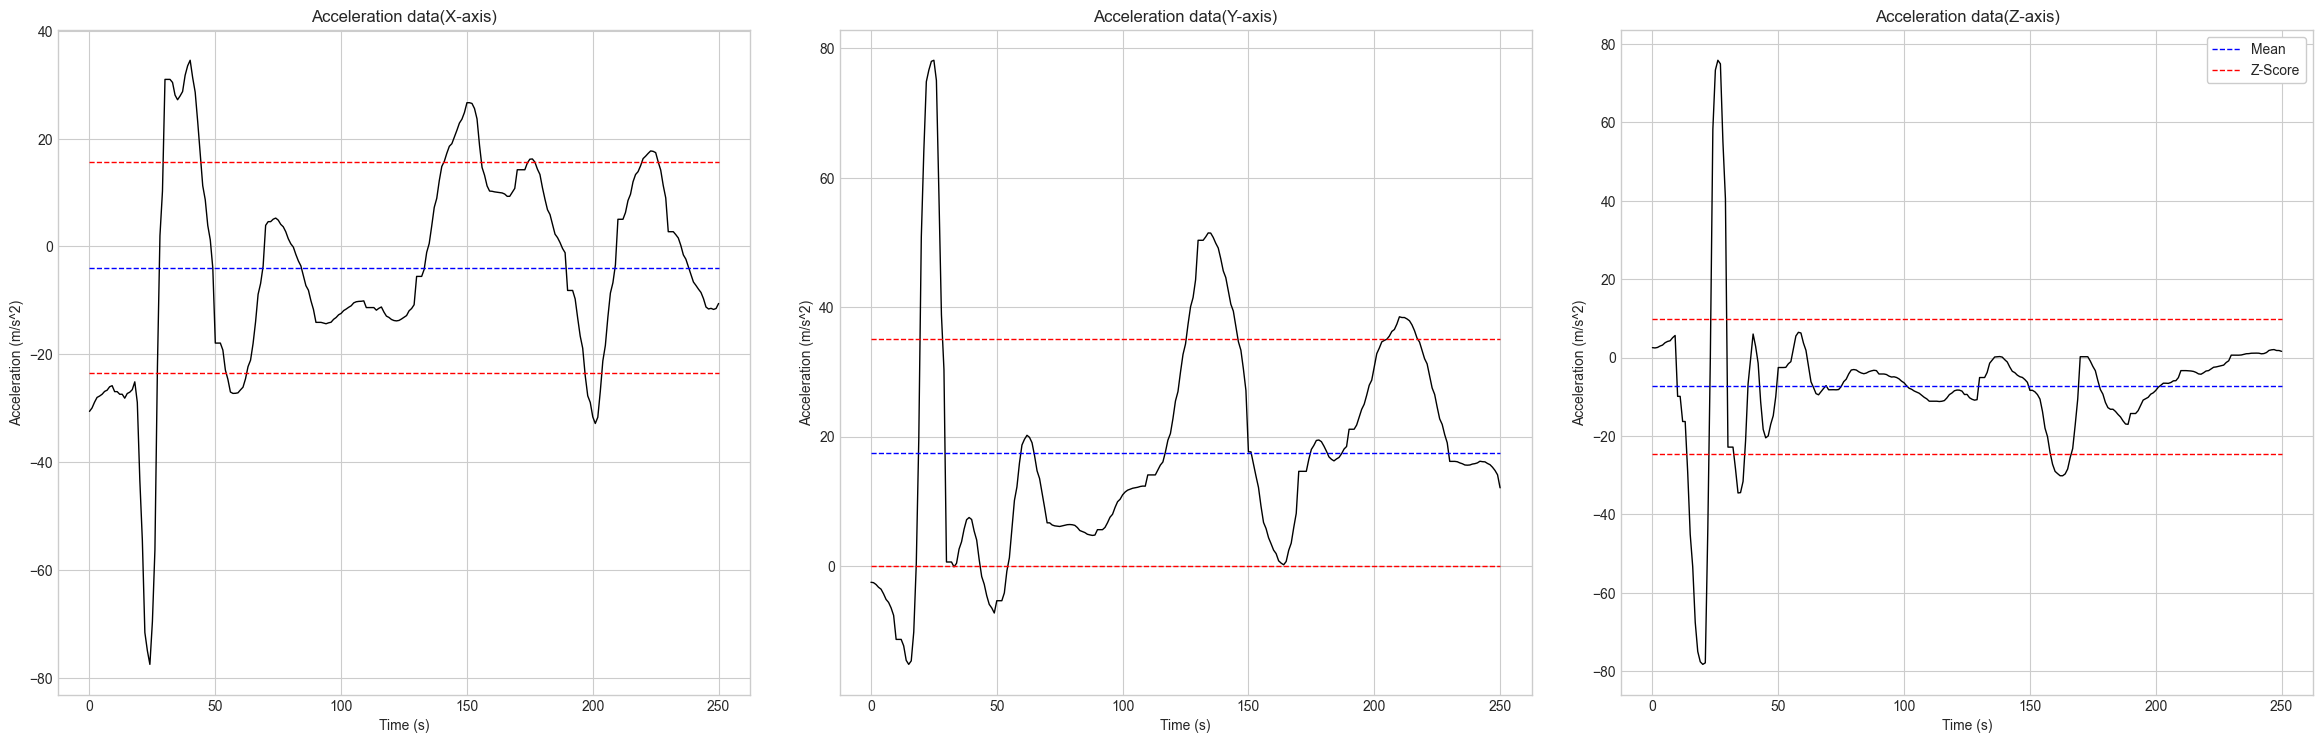

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (24,8))#24,5
fig.tight_layout(pad = 4.0)
plotveccomp(df_subset['Acceleration x (m/s^2)'], 'Acceleration X-axis', ax1)
plotveccomp(df_subset['Acceleration y (m/s^2)'], 'Acceleration Y-axis', ax2)
plotveccomp(df_subset['Acceleration z (m/s^2)'], 'Acceleration Z-axis', ax3)
plt.savefig('stdofvec.png')

Text(0.5, 1.0, 'Acceleration Magnitude')

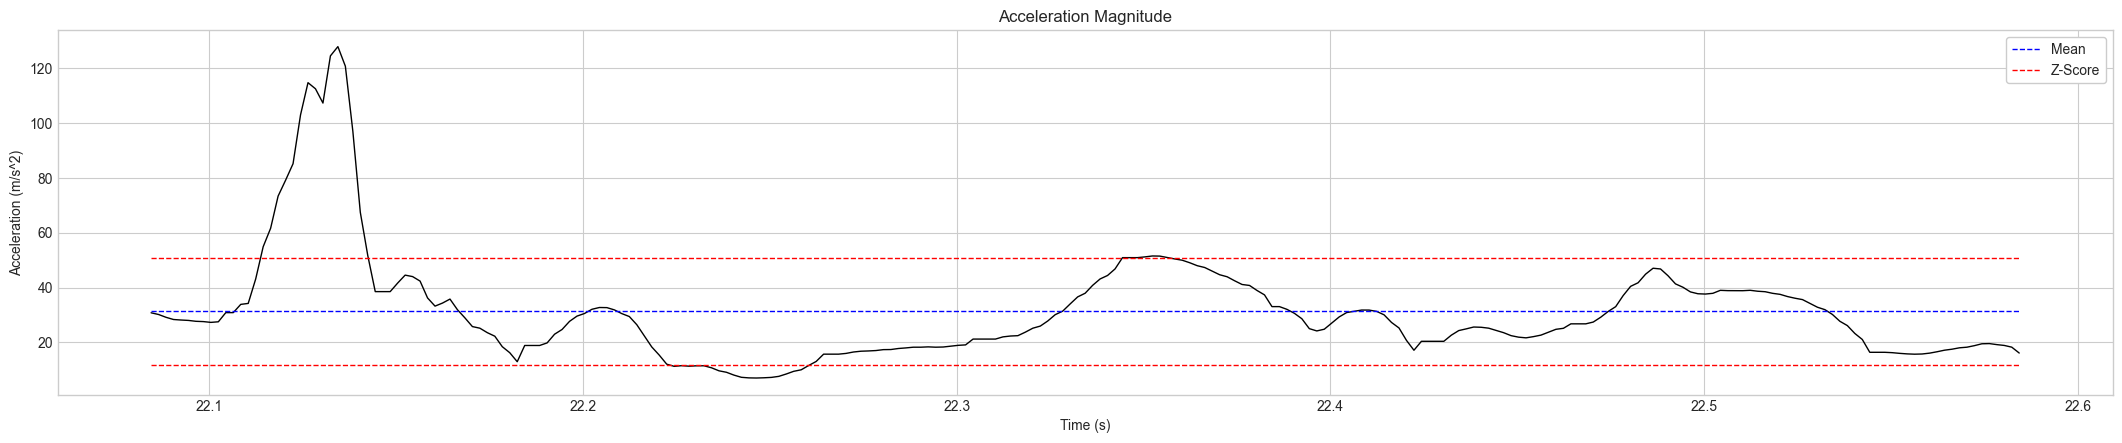

In [13]:
a_mag = np.sqrt(df_subset['Acceleration x (m/s^2)']**2 + df_subset['Acceleration y (m/s^2)']**2 + df_subset['Acceleration z (m/s^2)']**2)
t = df_subset['Time (s)']
fig, ax = plt.subplots(1, 1, figsize = (22,5))
fig.tight_layout(pad = 4.0)
ax.plot(t, a_mag, linewidth = 1, color = 'black', marker = '')
ax.plot(t, [np.mean(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='blue',label='Mean')
ax.plot(t, [np.mean(a_mag) - np.std(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='red',label='Z-Score')
ax.plot(t, [np.mean(a_mag) + np.std(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='red')
plt.legend(framealpha=1, frameon=True,bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (m/s^2)')
ax.set_title('Acceleration Magnitude')

In [14]:
#peak detection
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

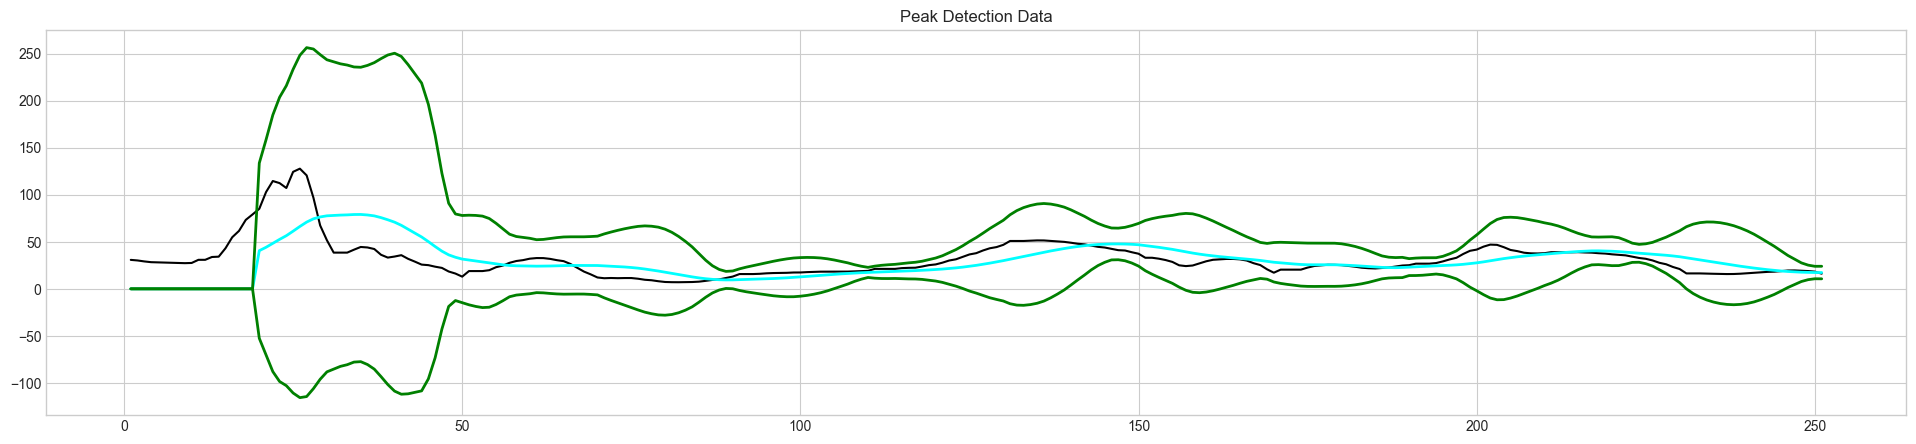

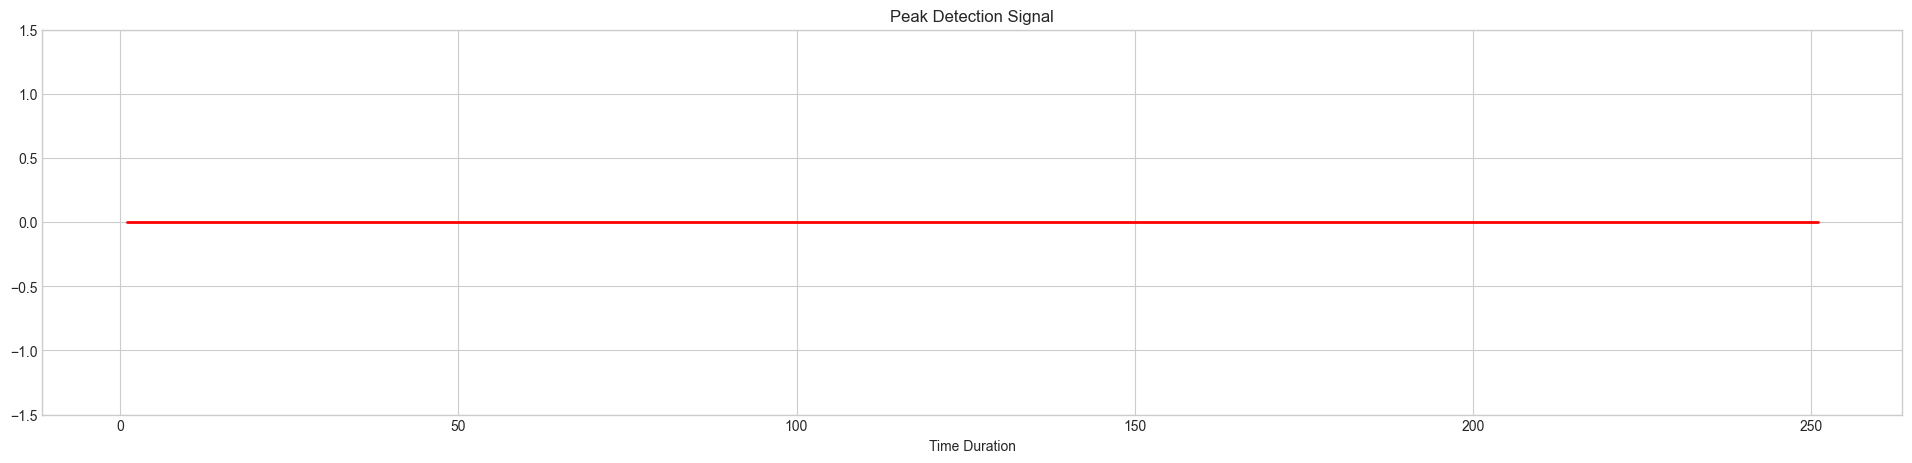

In [15]:
# Data
y = np.array(a_mag)
#y = np.array([])

# Settings: lag = 30, threshold = 5, influence = 0 #5,3.5,0
lag =20
threshold =5
influence = 0

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result
fig, ax = plt.subplots(1,1, figsize = (24,5))
#pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y,color = 'black')

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y)+1),
          result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)
ax.set_title('Peak Detection Data')

fig, ax = plt.subplots(1,1, figsize = (24,5))
#pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
#plt.xlim(200 , 300)
pylab.ylim(-1.5,1.5)
ax.set_xlabel('Time Duration')
ax.set_title('Peak Detection Signal')#(1 second)
pylab.show()

Detected Peaks and Outliers Indices: [ 19  20  21  22  23  24  25  26  27  34  40  60  71  74 104 134 162 177
 201 210 214 246]


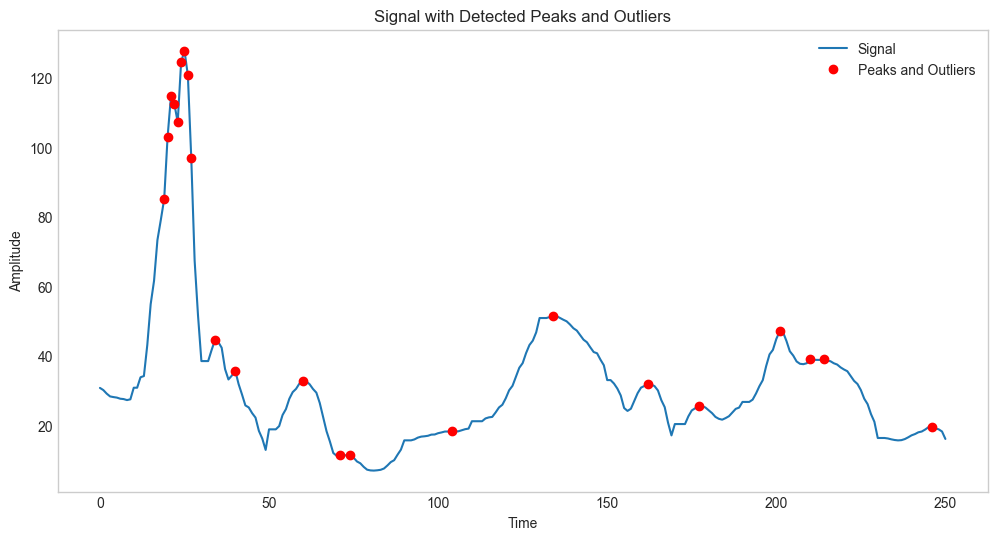

In [16]:
import numpy as np
from scipy import signal
from scipy.stats import zscore

# Generate some example signal data with peaks
# Replace this with your own signal data
signal_data = np.array(a_mag)  # Example random signal

# Define a peak detection function
def detect_peaks(signal_data, threshold=3.0):
    # Smooth the signal (optional)
    smoothed_signal = signal.savgol_filter(signal_data, window_length=11, polyorder=3)

    # Calculate z-scores to identify outliers
    z_scores = zscore(smoothed_signal)

    # Define a threshold for outliers
    outliers = np.abs(z_scores) > threshold

    # Find the indices of the detected peaks
    peak_indices = signal.find_peaks(signal_data, height=threshold)[0]

    # Combine peak indices with outlier indices
    combined_indices = np.union1d(peak_indices, np.where(outliers)[0])

    return combined_indices

# Set the threshold for outlier detection
outlier_threshold = 3.0

# Detect peaks and outliers in the signal
peaks_and_outliers = detect_peaks(signal_data, threshold=outlier_threshold)

# Print the detected peak and outlier indices
print("Detected Peaks and Outliers Indices:", peaks_and_outliers)

# Plot the signal with detected peaks and outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(signal_data, label="Signal")
plt.plot(peaks_and_outliers, signal_data[peaks_and_outliers], 'ro', label="Peaks and Outliers")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal with Detected Peaks and Outliers")
plt.grid()
plt.show()
